# Estudo de Caso: Problema de 2 corpos

<center>


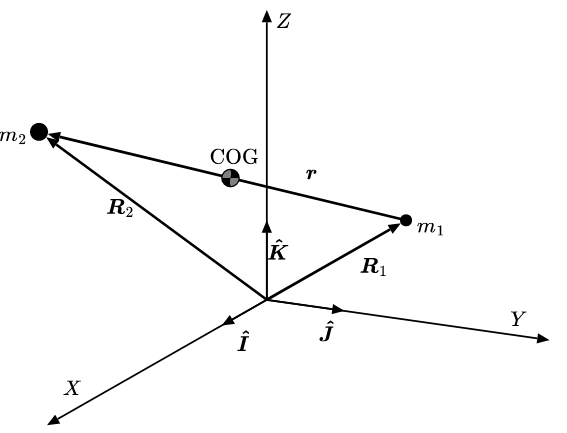

</center>

Em um referencial inercial, dois corpos interagindo gravitacionalmente apresentam posições $\vec{R_1}$ e $\vec{R_2}$ com relação à origem.

Seja $\vec{r}$ o vetor posição que liga os dois corpos

<center> $\vec{r} = \vec{R_2} - \vec{R_1}$ </center>

e, também, $\vec{u}$ um vetor unitário na direção de $\vec{r}$

<center> $\vec{u} = \frac{\vec{r}}{||\vec{r}||}$. </center>

Cada corpo presencia uma força gravitacional mutualmente provocada pelo outro, sendo $\vec{F_{12}}$ a força sobre o corpo 1 provocada pelo corpo 2 e $\vec{F_{21}}$ a força sobre o corpo 2 provocada pelo corpo 1, com

<center> $\vec{F_{12}} = -\vec{F_{21}}$. </center>

Como há apenas interações gravitacionais ocorrendo no sistema, podemos escrever

<center>
$\vec{F_{12}} = \frac{G m_{1} m_{2}}{r^2} \  \vec{u}$

$\vec{F_{21}} = -\frac{G m_{1} m_{2}}{r^2} \  \vec{u}$
</center>

E, pela segunda Lei de Newton, temos

<center>
$m_1 \ddot{\vec{R_{1}}} = \frac{G m_{1} m_{2}}{r^3} \  \vec{r}$

$m_2 \ddot{\vec{R_{2}}} = -\frac{G m_{1} m_{2}}{r^3} \  \vec{r}$
</center>

Obtendo as equações de movimento para o sistema.

<center>
$\ddot{\vec{R_{1}}} = G m_{2} \ \frac{\vec{r}}{r^3}$

$\ddot{\vec{R_{2}}} = -G m_{1} \ \frac{\vec{r}}{r^3}$
</center>

Nosso objetivo em um problema de dois corpos é determinar as posições de cada corpo em função do tempo. Para isso, é conveniente expressar as equações do movimento nas componentes ${\vec{X_{i}}}$, ${\vec{Y_{i}}}$ e ${\vec{Z_{i}}}$ do vetor ${\vec{R_{i}}}$.

<br>
<center>
$\ddot{X_{1}} = G m_{2} \ \frac{X_2 - X_1}{r^3} \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ddot{X_{2}} = - G m_{1} \ \frac{X_2 - X_1}{r^3} $ 

$\ddot{Y_{1}} = G m_{2} \ \frac{Y_2 - Y_1}{r^3} \ \ \ \ \ \ \ \ \ \ \ddot{Y_{2}} = - G m_{1} \ \frac{Y_2 - Y_1}{r^3}$

$\ddot{Z_{1}} = G m_{2} \ \frac{Z_2 - Z_1}{r^3} \ \ \ \ \ \ \ \ \ \ddot{Z_{2}} = - G m_{1} \ \frac{Z_2 - Z_1}{r^3} \\ $
</center>

Obtendo 6 equações diferenciais de segunda ordem acopladas. Para a resolução, precisaremos de 12 condições iniciais. As condições iniciais mais convenientes são as componentes de posição e velocidade de cada corpo.

## Solução Numérica

Para resolver numericamente essas EDOs de segunda ordem, iniciamos declarando a constante $G$ e as condições inicias do sistema. Para um exemplo inicial, tomamos os seguintes valores:

$\\m_1 = 1.0 \times 10^{26} \ kg \\ m_2 = 1.0 \times 10^{26} \ kg \\ \vec{R_{1}^{0}} = (0 \hat{I} + 0\hat{J} + 0\hat{K}) \ km \\ \vec{R_{2}^{0}} = (3000 \hat{I} + 0\hat{J} + 0\hat{K}) \ km \\ \vec{v_{1}^{0}} = (10 \hat{I} + 20\hat{J} + 30\hat{K}) \ km/s \\ \vec{v_{2}^{0}} = (0 \hat{I} + 40\hat{J} + 0\hat{K}) \ km/s \\ $


Os valores de posição e velocidade de cada corpo em função do tempo serão armazenados em um `vetor de estado`, um array `s` da forma 

<center>
$s = [X_1, Y_1, Z_1, X_2, Y_2, Z_2, \dot{X_1}, \dot{Y_1}, \dot{Z_1}, \dot{X_2}, \dot{Y_2}, \dot{Z_2}]$.
</center>

a partir do qual obteremos as condições de cada corpo em dado tempo para a visualização dos gráficos.

In [ ]:
# Importando as Bibliotecas necessárias

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Constante Gravitacional

G = 6.67430e-20  # km**3/(kg * s**2)

# Condições Iniciais

m_1 = 1.0e26  # kg
m_2 = 1.0e26  # kg

R_1_0 = np.array((0, 0, 0))  # km
R_2_0 = np.array((3000, 0, 0))  # km
dotR_1_0 = np.array((10, 20, 30))  # km/s
dotR_2_0 = np.array((0, 40, 0))  # km/s

s_0 = np.hstack((R_1_0, R_2_0, dotR_1_0, dotR_2_0)) # vetor de estado inicial


Dadas as posições e velocidades iniciais, o primeiro passo de nosso algoritmo de resolução é determinar as acelerações iniciais de cada corpo.

In [ ]:
R_1 = s_0[:3]
R_2 = s_0[3:6]

r = np.sqrt(np.sum(np.square(R_2 - R_1)))

ddot = G * (R_2 - R_1) / r**3
ddotR_1_0 = m_2 * ddot
ddotR_2_0 = -m_1 * ddot

Para um intervalo infinitesimal de tempo $dt$, as acelerações de ambos os compos podem ser consideradas constantes, de modo que as velocidades e posições do próximo intervalo são dadas por

<center>

$ \\ \dot{R_1} = \int_{0}^{t} \ddot{R_1}dt + \dot{R_{1}^{0}} \ \ \ \ \ \ \ \ \ \dot{R_2} = \int_{0}^{t} \ddot{R_2}dt + \dot{R_{2}^{0}}$ 

$R_1 = \int_{0}^{t} \dot{R_1}dt + R_{1}^{0} \ \ \ \ \ \ \ \ \ R_2 = \int_{0}^{t} \dot{R_2}dt + R_{2}^{0} \\ $ 

</center>

Discretizando o problema, podemos tomar um intervalo $\Delta t$ pequeno o suficiente, em uma aproximação, para que as velocidades e acelerações sejam constantes, de modo que possam ser escritas como:

<center>

$ \\ \dot{R_1} = \ddot{R_1} \Delta t + \dot{R_{1}^{0}} \ \ \ \ \ \ \ \ \ \dot{R_2} = \ddot{R_2}  \Delta t + \dot{R_{2}^{0}}$ 

$R_1 = \dot{R_1}  \Delta t + R_{1}^{0} \ \ \ \ \ \ \ \ \ R_2 = \dot{R_2}  \Delta t + R_{2}^{0} \\ $ 

</center>

Para menores valores de $\Delta t$ temos uma maior precisão nos valores do vetor de estado, contudo, exige um custo computacional maior.

Tal método de resolução numérica é chamado de ***Método de Euler***, e para implementá-lo em nosso programa, basta escolher realizar uma iteração na qual, em cada passo de tamanho $\Delta t$ escolhido, seja realizado o cálculo discretizado descrito acima e, finalizada a iteração, os valores iniciais sejam substituídos pelos calculados. 

In [ ]:
# Implementação do cálculo das velocidades e posições em cada passo:

dt = 1  # s
  
dotR_1_1 = ddotR_1_0 * dt + dotR_1_0
dotR_2_1 = ddotR_2_0 * dt + dotR_2_0

R_1_1 = dotR_1_0 * dt + R_1_0
R_2_1 = dotR_2_0 * dt + R_2_0

s = np.hstack((R_1_1, R_2_1, dotR_1_1, dotR_2_1)) # vetor de estado atual


### *Script* Completo


<ipython-input-5-fa2a0f248387>:89: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


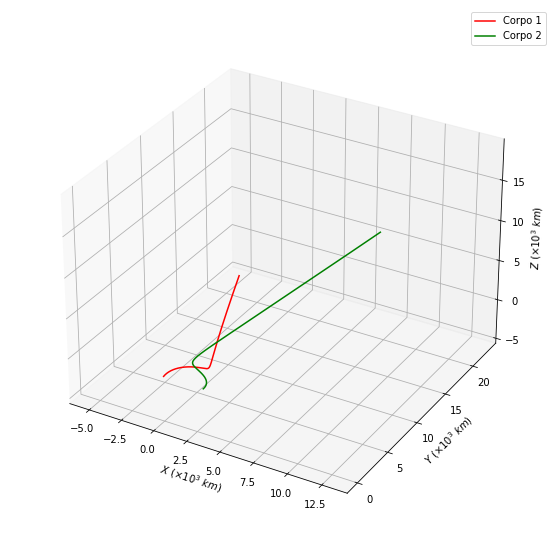

In [ ]:
# Importando as Bibliotecas necessárias

import matplotlib.pyplot as plt
import numpy as np


G = 6.67430e-20  # Constante Gravitacional, km**3/(kg * s**2)

# Condições Iniciais

m_1 = 1.0e26  # kg
m_2 = 1.0e26  # kg

R_1_0 = np.array((0, 0, 0))  # km
R_2_0 = np.array((3000, 0, 0))  # km
dotR_1_0 = np.array((10, 20, 30))  # km/s
dotR_2_0 = np.array((0, 40, 0))  # km/s

s_0 = np.hstack((R_1_0, R_2_0, dotR_1_0, dotR_2_0)) # vetor de estado inicial


# Função para obter as acelerações de cada corpo:

def get_ddot(s):
  R_1 = s[:3]
  R_2 = s[3:6]

  r = np.sqrt(np.sum(np.square(R_2 - R_1)))

  ddot = G * (R_2 - R_1) / r**3
  ddotR_1_0 = m_2 * ddot
  ddotR_2_0 = -m_1 * ddot

  return (ddotR_1_0, ddotR_2_0)


# Main loop:

dt = 1  # s
t_i = 0 # inicio da simulação
t_f = 480 # fim da simulação

ddotR_1_0 = get_ddot(s_0)[0]
ddotR_2_0 = get_ddot(s_0)[1]

# Arrays com as posições de cada corpo (para a plotagem dos gráficos)

plot_m1 = np.array([R_1_0])
plot_m2 = np.array([R_2_0])

for i in range(t_i, t_f):

  dotR_1_1 = ddotR_1_0 * dt + dotR_1_0
  dotR_2_1 = ddotR_2_0 * dt + dotR_2_0

  R_1_1 = dotR_1_0 * dt + R_1_0
  R_2_1 = dotR_2_0 * dt + R_2_0

  s = np.hstack((R_1_1, R_2_1, dotR_1_1, dotR_2_1)) # vetor de estado

  plot_m1 = np.append(plot_m1, [R_1_1], axis=0)
  plot_m2 = np.append(plot_m2, [R_2_1], axis=0)

  # Atualizando para a próxima iteração:

  ddotR_1_0 = get_ddot(s)[0]
  ddotR_2_0 = get_ddot(s)[1]

  dotR_1_0 = dotR_1_1
  dotR_2_0 = dotR_2_1

  R_1_0 = R_1_1
  R_2_0 = R_2_1

# Plotagem do gráfico:

fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection="3d")

ax.plot3D(plot_m1[:,0]/1000, plot_m1[:,1]/1000, plot_m1[:,2]/1000, 'red', label='Corpo 1')
ax.plot3D(plot_m2[:,0]/1000, plot_m2[:,1]/1000, plot_m2[:,2]/1000, 'green', label='Corpo 2')

ax.legend()

ax.set_xlabel('$X \ (× 10^3 \ km)$')
ax.set_ylabel('$Y \ (× 10^3 \ km)$')
ax.set_zlabel('$Z \ (× 10^3 \ km)$')

ax.dist = 11
plt.show()

### Análise da conservação da energia

In [ ]:
def E_K(_m_1, _m_2, _v_1, _v_2):
  
  v1 = np.sqrt(np.sum(np.square(_v_1)))
  v2 = np.sqrt(np.sum(np.square(_v_2)))

  k = (_m_1 * v1**2 + _m_2 * v2**2) / 2

  return k

In [ ]:
def E_U(_m_1, _m_2, _R_1, _R_2):

  r = np.sqrt(np.sum(np.square(_R_2 - _R_1)))

  U = -2 * G * _m_1 * _m_2 / r

  return U

<ipython-input-8-bf9d86c2f2d3>:102: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


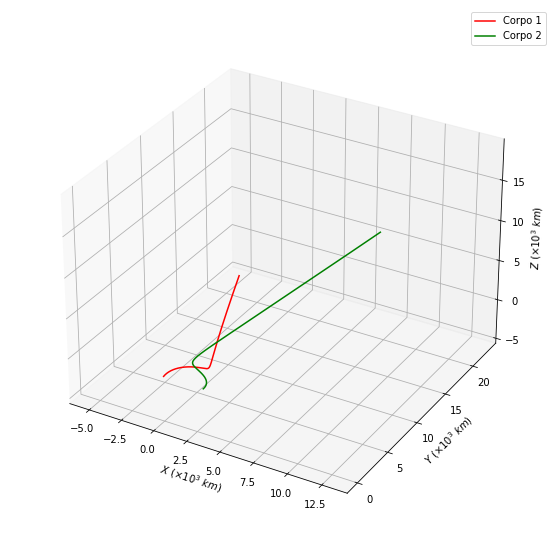

In [ ]:
# Importando as Bibliotecas necessárias

import matplotlib.pyplot as plt
import numpy as np


G = 6.67430e-20  # Constante Gravitacional, km**3/(kg * s**2)

# Condições Iniciais

m_1 = 1.0e26  # kg
m_2 = 1.0e26  # kg

R_1_0 = np.array((0, 0, 0))  # km
R_2_0 = np.array((3000, 0, 0))  # km
dotR_1_0 = np.array((10, 20, 30))  # km/s
dotR_2_0 = np.array((0, 40, 0))  # km/s

s_0 = np.hstack((R_1_0, R_2_0, dotR_1_0, dotR_2_0)) # vetor de estado inicial


# Função para obter as acelerações de cada corpo:

def get_ddot(s):
  R_1 = s[:3]
  R_2 = s[3:6]

  r = np.sqrt(np.sum(np.square(R_2 - R_1)))

  ddot = G * (R_2 - R_1) / r**3
  ddotR_1_0 = m_2 * ddot
  ddotR_2_0 = -m_1 * ddot

  return (ddotR_1_0, ddotR_2_0)


# Main loop:

dt = 1  # s
t_i = 0 # inicio da simulação
t_f = 480 # fim da simulação

ddotR_1_0 = get_ddot(s_0)[0]
ddotR_2_0 = get_ddot(s_0)[1]

# Arrays com as posições de cada corpo (para a plotagem dos gráficos)

plot_m1 = np.array([R_1_0])
plot_m2 = np.array([R_2_0])

# Arrays com as energias
K = np.array(E_K(m_1, m_2, dotR_1_0, dotR_2_0))
U = np.array(E_U(m_1, m_2, R_1_0, R_2_0))
E_m = np.array(E_K(m_1, m_2, dotR_1_0, dotR_2_0) + E_U(m_1, m_2, R_1_0, R_2_0))
time_s = np.array(0)

for i in range(t_i, t_f):

  dotR_1_1 = ddotR_1_0 * dt + dotR_1_0
  dotR_2_1 = ddotR_2_0 * dt + dotR_2_0

  R_1_1 = dotR_1_0 * dt + R_1_0
  R_2_1 = dotR_2_0 * dt + R_2_0

  s = np.hstack((R_1_1, R_2_1, dotR_1_1, dotR_2_1)) # vetor de estado

  plot_m1 = np.append(plot_m1, [R_1_1], axis=0)
  plot_m2 = np.append(plot_m2, [R_2_1], axis=0)

  # Análise da energia:

  K = np.append(K , E_K(m_1, m_2, dotR_1_1, dotR_2_1))
  U = np.append(U, E_U(m_1, m_2, R_1_1, R_2_1))
  E_m = np.append(E_m, E_K(m_1, m_2, dotR_1_1, dotR_2_1) + E_U(m_1, m_2, R_1_1, R_2_1))
  time_s = np.append(time_s, i)

  # Atualizando para a próxima iteração:

  ddotR_1_0 = get_ddot(s)[0]
  ddotR_2_0 = get_ddot(s)[1]

  dotR_1_0 = dotR_1_1
  dotR_2_0 = dotR_2_1

  R_1_0 = R_1_1
  R_2_0 = R_2_1

# Plotagem do gráfico:

fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection="3d")

ax.plot3D(plot_m1[:,0]/1000, plot_m1[:,1]/1000, plot_m1[:,2]/1000, 'red', label='Corpo 1')
ax.plot3D(plot_m2[:,0]/1000, plot_m2[:,1]/1000, plot_m2[:,2]/1000, 'green', label='Corpo 2')

ax.legend()

ax.set_xlabel('$X \ (× 10^3 \ km)$')
ax.set_ylabel('$Y \ (× 10^3 \ km)$')
ax.set_zlabel('$Z \ (× 10^3 \ km)$')

ax.dist = 11
plt.show()

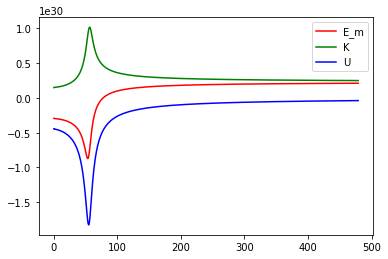

In [ ]:
fig = plt.figure()

plt.plot(time_s, E_m, 'red', label='E_m')
plt.plot(time_s, K, 'green', label='K')
plt.plot(time_s, U, 'blue', label='U')
plt.legend()

plt.show()



---



## Solução Númerica Utilizando Pacotes do Python

O método descrito acima para realizar a resolução das EDOs não é o mais eficiente. Percebemos que um passo de tamanho $1s$ e 480 iterações já é o suficiente para que a precisão despenque, fazendo com que deixe de ser computada a interação gravitacional entre os corpos, como visto no gráfico, e as posições de cada massa divirjam.

Para resolver este problema, existem diversos modelos numéricos para a resolução de equações diferenciais ordinárias, cada um com suas precisões e custos de computação. A linguagem python dispõe de diversos módulos que trabalham com esse tipo de cálculo. Abaixo, utilizo o pacote SciPy para resolver numéricamente essas EDOs, utilizando a função ODEINT.

In [ ]:
# Importando as Bibliotecas necessárias

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

G = 6.67430e-20  # Constante Gravitacional, km**3/(kg * s**2)

# Condições Iniciais

m_1 = 1.0e26  # kg
m_2 = 1.0e26  # kg

R_1_0 = np.array((0, 0, 0))  # km
R_2_0 = np.array((3000, 0, 0))  # km
dotR_1_0 = np.array((10, 20, 30))  # km/s
dotR_2_0 = np.array((0, 40, 0))  # km/s

s_0 = np.hstack((R_1_0, R_2_0, dotR_1_0, dotR_2_0)) # vetor de estado inicial


In [ ]:
def two_body_motion(_s, _t, _G, _m_1, _m_2):
  R_1 = _s[:3]
  R_2 = _s[3:6]

  dotR_1 = _s[6:9]
  dotR_2 = _s[9:]

  r = np.sqrt(np.sum(np.square(R_2 - R_1)))

  ddot = _G * (R_2 - R_1) / r**3
  ddotR_1 = _m_2 * ddot
  ddotR_2 = -_m_1 * ddot

  return np.concatenate((dotR_1, dotR_2, ddotR_1, ddotR_2))


t = np.linspace(0, 480, 1000)

# Solução da EDO

tb_solution = odeint(two_body_motion, s_0, t, args=(G, m_1, m_2))

plot_m1 = tb_solution[:,:3]
plot_m2 = tb_solution[:,3:6]

<ipython-input-12-8ad4771b0dce>:15: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 11


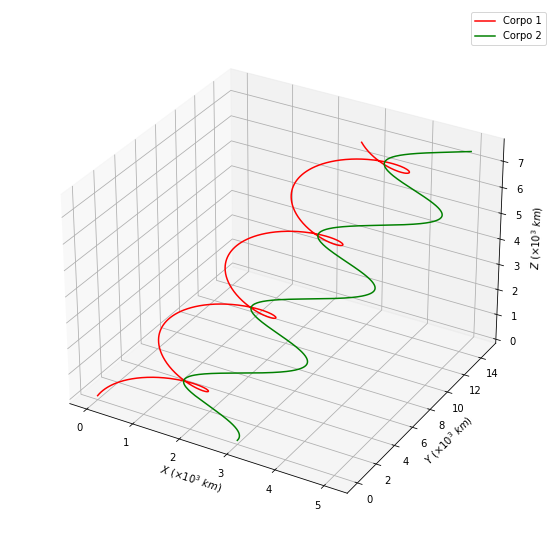

In [ ]:
# Plotagem do gráfico:

fig = plt.figure(figsize =(10, 10))
ax = plt.axes(projection="3d")

ax.plot3D(plot_m1[:,0]/1000, plot_m1[:,1]/1000, plot_m1[:,2]/1000, 'red', label='Corpo 1')
ax.plot3D(plot_m2[:,0]/1000, plot_m2[:,1]/1000, plot_m2[:,2]/1000, 'green', label='Corpo 2')

ax.legend()

ax.set_xlabel('$X \ (× 10^3 \ km)$')
ax.set_ylabel('$Y \ (× 10^3 \ km)$')
ax.set_zlabel('$Z \ (× 10^3 \ km)$')

ax.dist = 11
plt.show()